In [1]:
import json
from nrclex import NRCLex
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from urllib.parse import urlparse
from collections import Counter
from datetime import datetime
import datetime as dt
import numpy as np
from bokeh.models import CustomJS, ColumnDataSource, Select, Column
from bokeh.plotting import figure, show
from dateutil.tz import gettz
import pytz
import itertools

In [2]:
#Fetch the stored json data of posts and comments
analyzer = SentimentIntensityAnalyzer()

fp = open('postCollection.json','r',encoding='utf-8')
fc = open('commentCollection.json','r',encoding='utf-8')
dataP = json.load(fp)
dataC = json.load(fc)

In [3]:
postCount = 0
cmtCount = 0
posCount = 0
negCount = 0
neuCount = 0
polSRCount = 0
polSRCmtCount = 0
topicPDict = {"abortionPost":0,"inflationPost":0,"studLoanPost":0,"recessionPost":0,"electionPost":0,"trumpPost":0,
            "bidenPost":0,"lgbtqPost":0,"gunPost":0,"covidPost":0}
topicCDict = {"abortionCmt":0,"inflationCmt":0,"studLoanCmt":0,"recessionCmt":0,"electionCmt":0,"trumpCmt":0,
            "bidenCmt":0,"lgbtqCmt":0,"gunCmt":0,"covidCmt":0}


In [ ]:
#Simple sentiment and topic analysis for posts

In [4]:
for post in dataP:
    postCount += 1
    line = (post['title'].split('\n'))
    line2 = str(line).lower()
    vs = analyzer.polarity_scores(line)
    if vs['compound'] >= 0.6:
        posCount += 1
    if vs['compound'] <= -0.5:
        negCount += 1
    if ((vs['compound'] > -0.5) and (vs['compound'] < 0.6)):
        neuCount += 1
    
    if "abort" in line2 or "abortion" in line2:
        topicPDict["abortionPost"] +=1
    if "inflation" in line2:
        topicPDict["inflationPost"] +=1
    if "student loan" in line2:
        topicPDict["studLoanPost"] +=1
    if "recession" in line2:
        topicPDict["recessionPost"] +=1
    if "election" in line2 or "elections" in line2 or "votes" in line2 or "vote" in line2:
        topicPDict["electionPost"] +=1
    if "trump" in line2:
        topicPDict["trumpPost"] +=1
    if "biden" in line2:
        topicPDict["bidenPost"] +=1
    if "gay" in line2 or "lgbt" in line2 or "trans" in line2 or "pronoun" in line2:
        topicPDict["lgbtqPost"] +=1
    if "gun" in line2 or "weapon" in line2 or "second amendment" in line2:
        topicPDict["gunPost"] +=1
    if "covid" in line2:
        topicPDict["covidPost"] +=1
    
    if post['subreddit'] == "r/politics":
        polSRCount +=1    
        
print("r/politics posts : "+str(polSRCount))
print(topicPDict)
keysP = topicPDict.keys()
valuesP = topicPDict.values()
print("Total posts : "+str(postCount))
print("Positive posts: "+str(posCount))
print("Negative posts: "+str(negCount))
print("Neutral posts: "+str(neuCount))
print("% positive posts: "+str((posCount/postCount)*100))
print("% negative posts: "+str((negCount/postCount)*100))

r/politics posts : 6551
{'abortionPost': 794, 'inflationPost': 365, 'studLoanPost': 179, 'recessionPost': 72, 'electionPost': 4310, 'trumpPost': 4148, 'bidenPost': 2859, 'lgbtqPost': 598, 'gunPost': 672, 'covidPost': 568}
Total posts : 37532
Positive posts: 1673
Negative posts: 7375
Neutral posts: 28484
% positive posts: 4.4575295747628685
% negative posts: 19.64989875306405


In [5]:
posCount = 0
negCount = 0
neuCount = 0

In [6]:
#Simple sentiment and topic analysis for comments
for cmt in dataC:
    cmtCount += 1
    line = (cmt['comment_text'].split('\n'))
    line2 = str(line).lower()
    vs = analyzer.polarity_scores(line)
    if vs['compound'] >= 0.6:
        posCount += 1
    if vs['compound'] <= -0.5:
        negCount += 1
    if ((vs['compound'] > -0.5) and (vs['compound'] < 0.6)):
        neuCount += 1
    
    if "abort" in line2 or "abortion" in line2:
        topicCDict["abortionCmt"] +=1
    if "inflation" in line2:
        topicCDict["inflationCmt"] +=1
    if "student loan" in line2:
        topicCDict["studLoanCmt"] +=1
    if "recession" in line2:
        topicCDict["recessionCmt"] +=1
    if "election" in line2 or "elections" in line2 or "votes" in line2 or "vote" in line2:
        topicCDict["electionCmt"] +=1
    if "trump" in line2:
        topicCDict["trumpCmt"] +=1
    if "biden" in line2:
        topicCDict["bidenCmt"] +=1
    if "gay" in line2 or "lgbt" in line2 or "trans" in line2 or "pronoun" in line2:
        topicCDict["lgbtqCmt"] +=1
    if "gun" in line2 or "weapon" in line2 or "second amendment" in line2:
        topicCDict["gunCmt"] +=1
    if "covid" in line2:
        topicCDict["covidCmt"] +=1
    
    if cmt['subreddit'] == "r/politics":
        polSRCmtCount +=1

In [7]:
print("r/politics comments : "+str(polSRCmtCount))
print(topicCDict)
keysC = topicCDict.keys()
valuesC = topicCDict.values()
print("Total comments: "+str(cmtCount))
print("Positive comments: "+str(posCount))
print("Negative comments: "+str(negCount))
print("Neutral comments: "+str(neuCount))
print("% positive comments: "+str((posCount/cmtCount)*100))
print("% negative comments: "+str((negCount/cmtCount)*100))

r/politics comments : 172656
{'abortionCmt': 3930, 'inflationCmt': 3165, 'studLoanCmt': 1114, 'recessionCmt': 616, 'electionCmt': 45902, 'trumpCmt': 29076, 'bidenCmt': 10920, 'lgbtqCmt': 7385, 'gunCmt': 7989, 'covidCmt': 3221}
Total comments: 451999
Positive comments: 57682
Negative comments: 99992
Neutral comments: 294325
% positive comments: 12.761532658258092
% negative comments: 22.12217283666557


In [ ]:
#Plotting the popular topics discussed on subreddits

In [8]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

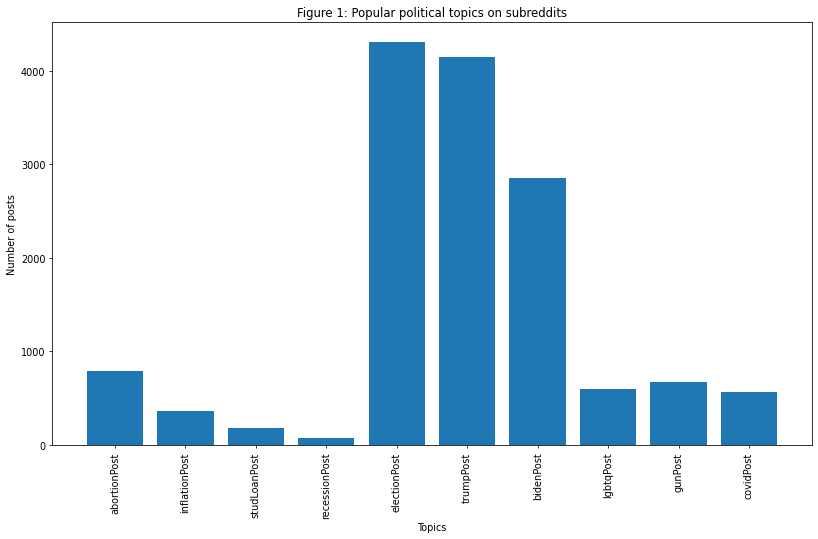

In [9]:
figure(figsize=(14,8), dpi = 70)
plt.title("Figure 1: Popular political topics on subreddits")
plt.xlabel("Topics")
plt.ylabel("Number of posts")
plt.xticks(rotation = 90)
graph1 = plt.bar(keysP,valuesP)

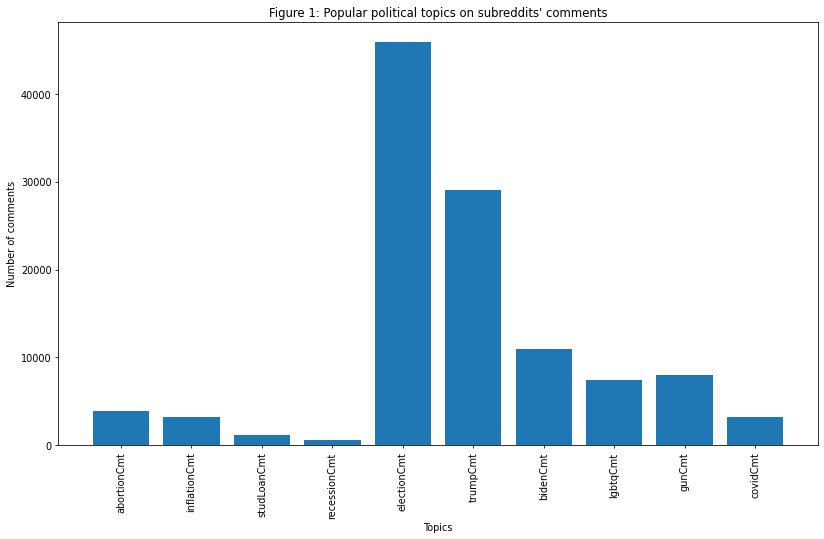

In [10]:
figure(figsize=(14,8), dpi = 70)
plt.title("Figure 1: Popular political topics on subreddits' comments")
plt.xlabel("Topics")
plt.ylabel("Number of comments")
plt.xticks(rotation = 90)
graph1 = plt.bar(keysC,valuesC)

In [11]:
print ("Trump data = "+str(topicPDict["trumpPost"]/postCount*100)+"%")
print ("Biden data = "+str(topicPDict["bidenPost"]/postCount*100)+"%")
print ("Election data = "+str(topicPDict["electionPost"]/postCount*100)+"%")

Trump data = 11.051902376638601%
Biden data = 7.617499733560695%
Election data = 11.483534050943195%


In [12]:
print ("Trump data = "+str(topicCDict["trumpCmt"]/cmtCount*100)+"%")
print ("Biden data = "+str(topicCDict["bidenCmt"]/cmtCount*100)+"%")
print ("Election data = "+str(topicCDict["electionCmt"]/cmtCount*100)+"%")

Trump data = 6.432757594596448%
Biden data = 2.4159345485277623%
Election data = 10.155332202062393%


In [ ]:
#Most popular news sources on subreddits

In [13]:
urlList = []
for posturl in dataP:
    templine = posturl['url']
    urlline = str(templine).lower()
    if (urlparse(urlline).netloc) != 'www.reddit.com' and (urlparse(urlline).netloc) != 'i.redd.it':
        urlList.append(urlparse(urlline).netloc)

c = Counter(urlList)
urlDict = dict(c.most_common(10))


In [14]:
print(urlDict)

{'www.reuters.com': 1313, 'www.tampafp.com': 1104, 'apnews.com': 975, 'www.theguardian.com': 906, 'www.cnn.com': 899, 'www.washingtonpost.com': 866, 'www.foxnews.com': 814, 'thehill.com': 752, 'www.nytimes.com': 679, 'nypost.com': 608}


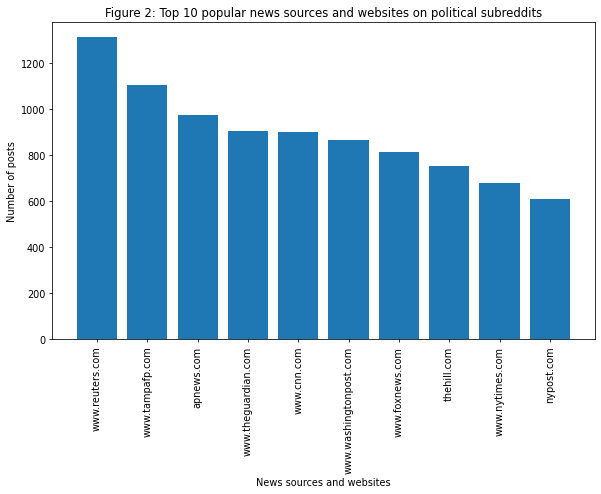

In [15]:
urlkeys = urlDict.keys()
urlvalues = urlDict.values()
figure(figsize=(10,6), dpi = 70)
plt.title("Figure 2: Top 10 popular news sources and websites on political subreddits")
plt.xlabel("News sources and websites")
plt.ylabel("Number of posts")
plt.xticks(rotation = 90)
urlgraph = plt.bar(urlkeys,urlvalues)

In [ ]:
#Number of posts per day on r/politics

In [16]:
dateList = []
for postdate in dataP:
    tempDate = ""
    if postdate['subreddit'] == "r/politics":
        postDate = postdate['created_utc']
        #print(postDate)
        datetime = dt.datetime.fromtimestamp(postDate, gettz("America/New_York"))
        dateList.append((datetime.isoformat(timespec='hours'))[:-9])


dateList.sort(key=lambda date: datetime.strptime(date,"%Y-%m-%d"))
   
c2 = Counter(dateList)
dateDict = dict(c2.items())
print(dateDict)

{'2022-10-25': 68, '2022-10-26': 172, '2022-10-27': 158, '2022-10-28': 133, '2022-10-29': 85, '2022-10-30': 85, '2022-10-31': 160, '2022-11-01': 195, '2022-11-02': 198, '2022-11-03': 193, '2022-11-04': 185, '2022-11-05': 110, '2022-11-06': 105, '2022-11-07': 205, '2022-11-08': 192, '2022-11-09': 342, '2022-11-10': 237, '2022-11-11': 204, '2022-11-12': 144, '2022-11-13': 139, '2022-11-14': 226, '2022-11-15': 203, '2022-11-16': 189, '2022-11-17': 187, '2022-11-18': 146, '2022-11-19': 94, '2022-11-20': 92, '2022-11-21': 149, '2022-11-22': 156, '2022-11-23': 149, '2022-11-24': 54, '2022-11-25': 67, '2022-11-26': 57, '2022-11-27': 58, '2022-11-28': 162, '2022-11-29': 185, '2022-11-30': 166, '2022-12-01': 175, '2022-12-02': 146, '2022-12-03': 83, '2022-12-04': 76, '2022-12-05': 151, '2022-12-06': 143, '2022-12-07': 127}


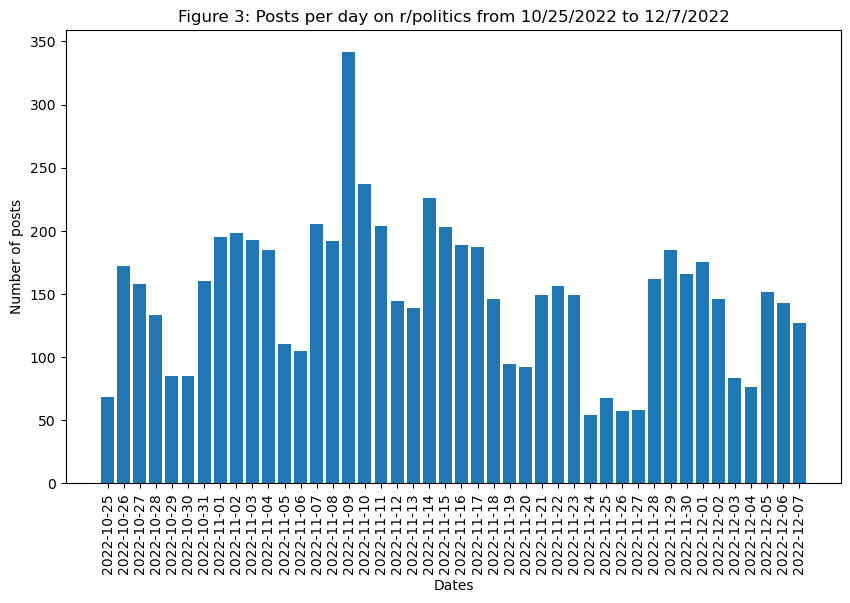

In [17]:
datekeys = dateDict.keys()
datevalues = dateDict.values()
figure(figsize=(10,6), dpi = 100)
plt.title("Figure 3: Posts per day on r/politics from 10/25/2022 to 12/7/2022")
plt.xlabel("Dates")
plt.ylabel("Number of posts")
plt.xticks(rotation = 90)
urlgraph = plt.bar(datekeys,datevalues)

In [18]:
dateList = []
for postdate in dataC:
    tempDate = ""
    if postdate['subreddit'] == "r/politics":
        postDate = postdate['created_utc']
        #print(postDate)
        datetime = dt.datetime.fromtimestamp(postDate, gettz("America/New_York"))
        dateList.append((datetime.isoformat(timespec='hours'))[:-9])


dateList.sort(key=lambda date: datetime.strptime(date,"%Y-%m-%d"))
   
c2 = Counter(dateList)
dateDict = dict(c2.items())
print(dateDict)

{'2022-10-25': 171, '2022-10-26': 1349, '2022-10-27': 1175, '2022-10-28': 1373, '2022-10-29': 1575, '2022-10-30': 1195, '2022-10-31': 1925, '2022-11-01': 4789, '2022-11-02': 5474, '2022-11-03': 5337, '2022-11-04': 4559, '2022-11-05': 3077, '2022-11-06': 3523, '2022-11-07': 5604, '2022-11-08': 7259, '2022-11-09': 12256, '2022-11-10': 8067, '2022-11-11': 7181, '2022-11-12': 3816, '2022-11-13': 3693, '2022-11-14': 7008, '2022-11-15': 6133, '2022-11-16': 5583, '2022-11-17': 5301, '2022-11-18': 4848, '2022-11-19': 3176, '2022-11-20': 3616, '2022-11-21': 5348, '2022-11-22': 2874, '2022-11-23': 1233, '2022-11-24': 1056, '2022-11-25': 1913, '2022-11-26': 2439, '2022-11-27': 2969, '2022-11-28': 4448, '2022-11-29': 4232, '2022-11-30': 4118, '2022-12-01': 3889, '2022-12-02': 2644, '2022-12-03': 2401, '2022-12-04': 2981, '2022-12-05': 4156, '2022-12-06': 3560, '2022-12-07': 3332}


In [ ]:
#Plot number of comments per day

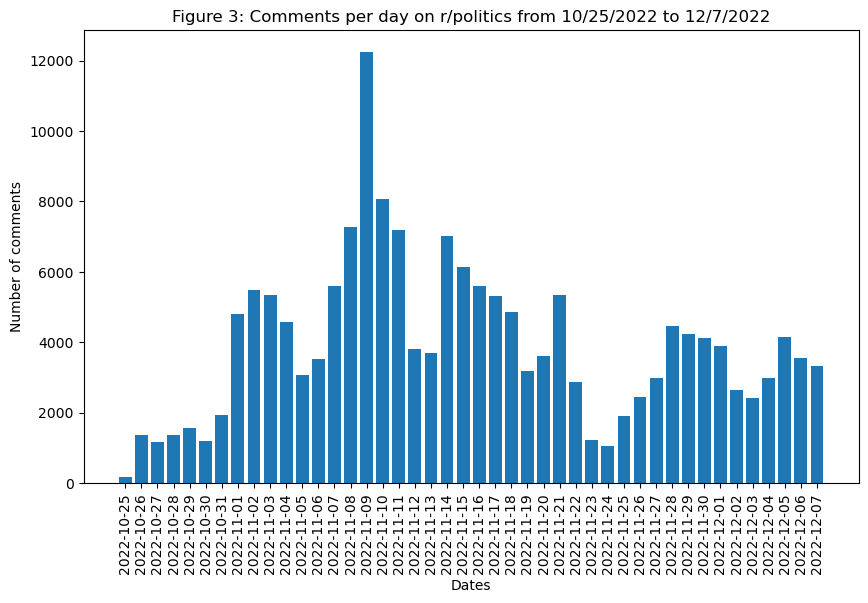

In [19]:
datekeys = dateDict.keys()
datevalues = dateDict.values()
figure(figsize=(10,6), dpi = 100)
plt.title("Figure 3: Comments per day on r/politics from 10/25/2022 to 12/7/2022")
plt.xlabel("Dates")
plt.ylabel("Number of comments")
plt.xticks(rotation = 90)
urlgraph = plt.bar(datekeys,datevalues)

In [ ]:
#Getting different emotion scores from posts and comments

In [20]:
totalEmDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
totalEmCount = 0
for nrPost in dataP:
    tempNrDict = {}
    nrText = nrPost['title']
    text_object = NRCLex(nrText)
    #print(nrText)
    tempNrDict = text_object.raw_emotion_scores
    tempNrKeys = tempNrDict.keys()
    #tempNrValues = tempNrDict.values()
    for i in tempNrKeys:
        totalEmDict[i] += tempNrDict[i]
print(totalEmDict)
for tempTotalKey in totalEmDict:
    totalEmCount += totalEmDict[tempTotalKey]
print(totalEmCount)

#print (" = "+str(totalEmDict[""]/totalEmCount*100)+"%")
for tempTotalKey in totalEmDict:
    print(tempTotalKey+" = "+str(totalEmDict[tempTotalKey]/totalEmCount*100)+"%")
    


{'positive': 16569, 'negative': 18742, 'anger': 10169, 'anticipation': 8664, 'disgust': 4459, 'fear': 13268, 'joy': 4993, 'sadness': 8184, 'surprise': 4045, 'trust': 12760}
101853
positive = 16.267562074754792%
negative = 18.401028933855653%
anger = 9.983996544038957%
anticipation = 8.506376837206563%
disgust = 4.377877922103424%
fear = 13.026616790865267%
joy = 4.902162921072526%
sadness = 8.035109422402876%
surprise = 3.9714097768352428%
trust = 12.527858776864697%


In [21]:
for nrCmt in dataC:
    tempNrDict = {}
    nrText = nrCmt['comment_text']
    text_object = NRCLex(nrText)
    #print(nrText)
    tempNrDict = text_object.raw_emotion_scores
    tempNrKeys = tempNrDict.keys()
    #tempNrValues = tempNrDict.values()
    for i in tempNrKeys:
        totalEmDict[i] += tempNrDict[i]
print(totalEmDict)
for tempTotalKey in totalEmDict:
    totalEmCount += totalEmDict[tempTotalKey]
print(totalEmCount)

#print (" = "+str(totalEmDict[""]/totalEmCount*100)+"%")
for tempTotalKey in totalEmDict:
    print(tempTotalKey+" = "+str(totalEmDict[tempTotalKey]/totalEmCount*100)+"%")

{'positive': 579016, 'negative': 568991, 'anger': 301052, 'anticipation': 301109, 'disgust': 178286, 'fear': 330142, 'joy': 207750, 'sadness': 265811, 'surprise': 159558, 'trust': 399391}
3392959
positive = 17.065222420901637%
negative = 16.769757606855844%
anger = 8.872845206794423%
anticipation = 8.87452515636057%
disgust = 5.254587514909552%
fear = 9.73020894151683%
joy = 6.122974076609826%
sadness = 7.834194282925316%
surprise = 4.702620927632783%
trust = 11.771170827587365%


In [ ]:
#Creating a list of just dates for future plotting of graphs with dates on X axis

In [22]:
dateList = []
for postdate in dataP:
    tempDate = ""
    if postdate['subreddit'] == "r/politics":
        postDate = postdate['created_utc']
        #print(postDate)
        datetime = dt.datetime.fromtimestamp(postDate, gettz("America/New_York"))
        tempDate = datetime.isoformat(timespec='hours')[:-9]
        if tempDate not in dateList:
            dateList.append((datetime.isoformat(timespec='hours'))[:-9])


dateList.sort(key=lambda date: datetime.strptime(date,"%Y-%m-%d"))
#print(dateList)

dateEmDict = dict.fromkeys(dateList, {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0})

In [23]:
print(dateList)
#print(dateEmDict)

['2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07']


In [24]:
"""
#totalEmDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
#totalEmCount = 0
for dateNrPost in dataP:
    tempNrDict = {}
    nrText = dateNrPost['title']
    #print(nrText)
    postUtcDate = dateNrPost['created_utc']
    text_object = NRCLex(nrText)
    tempNrDict = text_object.raw_emotion_scores

    datetime = dt.datetime.fromtimestamp(postUtcDate, gettz("America/New_York"))
    tempEstDate = datetime.isoformat(timespec='hours')[:-9]
    
    if tempEstDate in dateEmDict.keys():
        #print("tempEstDate = "+tempEstDate)
        #print("Dict date = "+str(dateEmDict[tempEstDate]))
        for i in tempNrDict.keys():
            dateEmDict[tempEstDate][i] += tempNrDict[i]
        print(nrText)
        print("tempEstDate = "+tempEstDate)
        print("Dict date = "+str(dateEmDict[tempEstDate]))
            
#print(dateEmDict)
"""

'\n#totalEmDict = {\'positive\':0,\'negative\':0,\'anger\':0,\'anticipation\':0,\'disgust\':0,\'fear\':0,\'joy\':0,\'sadness\':0,\'surprise\':0,\'trust\':0}\n#totalEmCount = 0\nfor dateNrPost in dataP:\n    tempNrDict = {}\n    nrText = dateNrPost[\'title\']\n    #print(nrText)\n    postUtcDate = dateNrPost[\'created_utc\']\n    text_object = NRCLex(nrText)\n    tempNrDict = text_object.raw_emotion_scores\n\n    datetime = dt.datetime.fromtimestamp(postUtcDate, gettz("America/New_York"))\n    tempEstDate = datetime.isoformat(timespec=\'hours\')[:-9]\n    \n    if tempEstDate in dateEmDict.keys():\n        #print("tempEstDate = "+tempEstDate)\n        #print("Dict date = "+str(dateEmDict[tempEstDate]))\n        for i in tempNrDict.keys():\n            dateEmDict[tempEstDate][i] += tempNrDict[i]\n        print(nrText)\n        print("tempEstDate = "+tempEstDate)\n        print("Dict date = "+str(dateEmDict[tempEstDate]))\n            \n#print(dateEmDict)\n'

In [25]:
"""for eachDate in dateList:
    pnDict = {}
    pText = ''
    puTime = 0
    for eachPost in dataP:
        pnDict = {}
        epEmDict = {}
        pText = eachPost['title']
        puTime = eachPost['created_utc']
        
        datetime = dt.datetime.fromtimestamp(puTime, gettz("America/New_York"))
        peTime = datetime.isoformat(timespec='hours')[:-9]
        
        if eachDate == peTime:
            pnObject = NRCLex(pText)
            pnDict = pnObject.raw_emotion_scores
            for eachEmotion in pnDict.keys():
                dateEmDict[eachDate][eachEmotion] += pnDict[eachEmotion]

print(dateEmDict)"""

'for eachDate in dateList:\n    pnDict = {}\n    pText = \'\'\n    puTime = 0\n    for eachPost in dataP:\n        pnDict = {}\n        epEmDict = {}\n        pText = eachPost[\'title\']\n        puTime = eachPost[\'created_utc\']\n        \n        datetime = dt.datetime.fromtimestamp(puTime, gettz("America/New_York"))\n        peTime = datetime.isoformat(timespec=\'hours\')[:-9]\n        \n        if eachDate == peTime:\n            pnObject = NRCLex(pText)\n            pnDict = pnObject.raw_emotion_scores\n            for eachEmotion in pnDict.keys():\n                dateEmDict[eachDate][eachEmotion] += pnDict[eachEmotion]\n\nprint(dateEmDict)'

In [26]:
#totalEmDict = {}
eachDateDict = {}
#eachPostDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}

for eachDate in dateList:
    tdDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
    for eachPost in dataP:
        pnDict = {}
        #eachPostDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
        pText = eachPost['title']
        puTime = eachPost['created_utc']
        
        pnObject = NRCLex(pText)
        pnDict = pnObject.raw_emotion_scores
        
        datetime = dt.datetime.fromtimestamp(puTime, gettz("America/New_York"))
        peTime = datetime.isoformat(timespec='hours')[:-9]
        
        if eachDate == peTime:
            for i in pnDict.keys():
                tdDict[i] += pnDict[i]        
        
    eachDateDict[eachDate] = tdDict
        
        
    


In [27]:
print(eachDateDict)

{'2022-10-25': {'positive': 137, 'negative': 141, 'anger': 85, 'anticipation': 82, 'disgust': 29, 'fear': 87, 'joy': 43, 'sadness': 65, 'surprise': 45, 'trust': 109}, '2022-10-26': {'positive': 290, 'negative': 387, 'anger': 189, 'anticipation': 153, 'disgust': 99, 'fear': 277, 'joy': 76, 'sadness': 170, 'surprise': 68, 'trust': 243}, '2022-10-27': {'positive': 321, 'negative': 347, 'anger': 167, 'anticipation': 172, 'disgust': 79, 'fear': 257, 'joy': 91, 'sadness': 140, 'surprise': 64, 'trust': 263}, '2022-10-28': {'positive': 309, 'negative': 369, 'anger': 217, 'anticipation': 160, 'disgust': 80, 'fear': 295, 'joy': 104, 'sadness': 153, 'surprise': 79, 'trust': 254}, '2022-10-29': {'positive': 191, 'negative': 272, 'anger': 157, 'anticipation': 99, 'disgust': 59, 'fear': 200, 'joy': 59, 'sadness': 108, 'surprise': 61, 'trust': 119}, '2022-10-30': {'positive': 208, 'negative': 289, 'anger': 165, 'anticipation': 113, 'disgust': 71, 'fear': 211, 'joy': 65, 'sadness': 126, 'surprise': 55

In [ ]:
#Block of code for comments emotion analysis

In [28]:
eachCDateDict = {}

In [29]:
#totalEmDict = {}
eachCDateDict = {}
#eachPostDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}

for eachDate in dateList:
    tdDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
    for eachComment in dataC:
        pnDict = {}
        #eachPostDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
        pText = eachComment['comment_text']
        puTime = eachComment['created_utc']
        
        pnObject = NRCLex(pText)
        pnDict = pnObject.raw_emotion_scores
        
        datetime = dt.datetime.fromtimestamp(puTime, gettz("America/New_York"))
        peTime = datetime.isoformat(timespec='hours')[:-9]
        
        if eachDate == peTime:
            for i in pnDict.keys():
                tdDict[i] += pnDict[i]        
        
    eachCDateDict[eachDate] = tdDict

In [30]:
print(eachCDateDict)

{'2022-10-25': {'positive': 3622, 'negative': 3646, 'anger': 1957, 'anticipation': 1998, 'disgust': 1169, 'fear': 2203, 'joy': 1279, 'sadness': 1852, 'surprise': 1021, 'trust': 2431}, '2022-10-26': {'positive': 6340, 'negative': 6275, 'anger': 3335, 'anticipation': 3298, 'disgust': 2074, 'fear': 3820, 'joy': 2187, 'sadness': 3169, 'surprise': 1720, 'trust': 4350}, '2022-10-27': {'positive': 8957, 'negative': 8811, 'anger': 4579, 'anticipation': 4589, 'disgust': 2762, 'fear': 5244, 'joy': 3254, 'sadness': 4185, 'surprise': 2398, 'trust': 6372}, '2022-10-28': {'positive': 8554, 'negative': 9149, 'anger': 5143, 'anticipation': 4535, 'disgust': 2982, 'fear': 5784, 'joy': 3002, 'sadness': 4209, 'surprise': 2407, 'trust': 5889}, '2022-10-29': {'positive': 8218, 'negative': 9095, 'anger': 5076, 'anticipation': 4220, 'disgust': 2899, 'fear': 5604, 'joy': 2988, 'sadness': 4127, 'surprise': 2362, 'trust': 5596}, '2022-10-30': {'positive': 8221, 'negative': 8457, 'anger': 4616, 'anticipation': 41

In [ ]:
#Converting nested dictionary to lists for plots

In [83]:
positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust = [],[],[],[],[],[],[],[],[],[]
allpostpositive,allpostnegative = [],[]

In [84]:
for i in eachDateDict:
    #print(i)
    for j in eachDateDict[i].keys():
        if j == 'positive':
            positive.append(eachDateDict[i][j]+eachCDateDict[i][j])
            allpostpositive.append(eachDateDict[i][j])
        if j == 'negative':
            negative.append(eachDateDict[i][j]+eachCDateDict[i][j])
            allpostnegative.append(eachDateDict[i][j])
        if j == 'anger':
            anger.append(eachDateDict[i][j]+eachCDateDict[i][j])
        if j == 'anticipation':
            anticipation.append(eachDateDict[i][j]+eachCDateDict[i][j])
        if j == 'disgust':
            disgust.append(eachDateDict[i][j]+eachCDateDict[i][j])
        if j == 'fear':
            fear.append(eachDateDict[i][j]+eachCDateDict[i][j])
        if j == 'joy':
            joy.append(eachDateDict[i][j]+eachCDateDict[i][j])
        if j == 'sadness':
            sadness.append(eachDateDict[i][j]+eachCDateDict[i][j])
        if j == 'surprise':
            surprise.append(eachDateDict[i][j]+eachCDateDict[i][j])
        if j == 'trust':
            trust.append(eachDateDict[i][j]+eachCDateDict[i][j])

In [85]:
#print(positive)
"""print('negative '+str(sum(negative)))
print('anger '+str(sum(anger)))
print('anticipation '+str(sum(anticipation)))
print('disgust '+str(sum(disgust)))
print('fear '+str(sum(fear)))
print('joy '+str(sum(joy)))
print('sadness '+str(sum(sadness)))
print('surprise '+str(sum(surprise)))
print('trust '+str(sum(trust)))"""

"print('negative '+str(sum(negative)))\nprint('anger '+str(sum(anger)))\nprint('anticipation '+str(sum(anticipation)))\nprint('disgust '+str(sum(disgust)))\nprint('fear '+str(sum(fear)))\nprint('joy '+str(sum(joy)))\nprint('sadness '+str(sum(sadness)))\nprint('surprise '+str(sum(surprise)))\nprint('trust '+str(sum(trust)))"

In [ ]:
#Plotting interactive graph with dropdown option containing emotions

In [88]:
from bokeh.models import CustomJS, ColumnDataSource, Select, Column
from bokeh.plotting import figure, show

In [89]:
emPlot = figure(x_range = dateList, y_range = (0, 30000),plot_width=1200, plot_height=500)
emPlot.xaxis.major_label_orientation = np.pi/4
emPlot.xaxis.axis_label = "Days"
emPlot.yaxis.axis_label = "Emotion score"
emPlot.xaxis.axis_label_text_font_size = "20pt"
emPlot.yaxis.axis_label_text_font_size = "20pt"
emPlot.axis.axis_label_text_font_style = 'bold'
data =  {'Positive': {'x': dateList, 'y':positive},
         'Negative': {'x': dateList, 'y':negative},
         'Anger': {'x': dateList, 'y':anger},
         'Anticipation': {'x': dateList, 'y':anticipation},
         'Disgust': {'x': dateList, 'y':disgust},
         'Fear': {'x': dateList, 'y':fear},
         'Joy': {'x': dateList, 'y':joy},
         'Sadness': {'x': dateList, 'y':sadness},
         'Surprise': {'x': dateList, 'y':surprise},
         'Trust': {'x': dateList, 'y':trust}}

source = ColumnDataSource(data['Positive'])
emPlot.line('x','y', line_width = 3, source = source)

callback = CustomJS(args = {'source': source, 'data': data},
code = """source.data = data[cb_obj.value]; """)

select = Select(title = 'Choose Emotion', value = 'Positive', options = ['Positive', 'Negative', 'Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust'])
select.js_on_change('value', callback)

layout = Column(select, emPlot)
show(layout)

In [ ]:
#Top 6 emotions graph plot

In [132]:
emAll = figure(title="Top 6 emotions graph",x_range = dateList, x_axis_label='Dates', y_axis_label='Emotions score',
               y_range = (0, 30000),plot_width=1400, plot_height=700)
emAll.xaxis.major_label_orientation = np.pi/4
emAll.xaxis.axis_label_text_font_size = "20pt"
emAll.yaxis.axis_label_text_font_size = "20pt"
emAll.axis.axis_label_text_font_style = 'bold'

In [133]:
emAll.line(dateList, positive, legend_label="Positive", color="#2ECC71", line_width=2)
emAll.line(dateList, negative, legend_label="Negative", color="#F1C40F", line_width=2)
emAll.line(dateList, fear, legend_label="Fear", color="#F39C12", line_width=2)
emAll.line(dateList, trust, legend_label="Trust", color="#3498DB", line_width=2)
emAll.line(dateList, anger, legend_label="Anger", color="#E74C3C", line_width=2)
emAll.line(dateList, anticipation, legend_label="Anticipation", color="#95A5A6", line_width=2)


GlyphRenderer(id='6983', ...)

In [134]:
show(emAll)

In [ ]:
#Graph for emotion scores of Elections as the topic

In [93]:
ElectionEmDict = {}
#eachPostDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}

for eachDate in dateList:
    tdDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
    for eachPost in dataP:
        pnDict = {}
        #eachPostDict = {'positive':0,'negative':0,'anger':0,'anticipation':0,'disgust':0,'fear':0,'joy':0,'sadness':0,'surprise':0,'trust':0}
        tpText = (eachPost['title'].split('\n'))
        pText = line2 = str(tpText).lower()
        puTime = eachPost['created_utc']
        if "election" in pText or "elections" in pText or "votes" in pText or "vote" in pText:
            pnObject = NRCLex(pText)
            pnDict = pnObject.raw_emotion_scores
        
            datetime = dt.datetime.fromtimestamp(puTime, gettz("America/New_York"))
            peTime = datetime.isoformat(timespec='hours')[:-9]
        
            if eachDate == peTime:
                for i in pnDict.keys():
                    tdDict[i] += pnDict[i]       
        
        ElectionEmDict[eachDate] = tdDict

In [62]:
print(ElectionEmDict)

{'2022-10-25': {'positive': 41, 'negative': 33, 'anger': 28, 'anticipation': 27, 'disgust': 4, 'fear': 12, 'joy': 19, 'sadness': 16, 'surprise': 16, 'trust': 35}, '2022-10-26': {'positive': 60, 'negative': 89, 'anger': 53, 'anticipation': 38, 'disgust': 23, 'fear': 50, 'joy': 17, 'sadness': 42, 'surprise': 23, 'trust': 51}, '2022-10-27': {'positive': 69, 'negative': 66, 'anger': 38, 'anticipation': 49, 'disgust': 13, 'fear': 40, 'joy': 23, 'sadness': 28, 'surprise': 25, 'trust': 50}, '2022-10-28': {'positive': 61, 'negative': 84, 'anger': 63, 'anticipation': 39, 'disgust': 17, 'fear': 47, 'joy': 24, 'sadness': 33, 'surprise': 24, 'trust': 57}, '2022-10-29': {'positive': 30, 'negative': 34, 'anger': 21, 'anticipation': 26, 'disgust': 4, 'fear': 16, 'joy': 13, 'sadness': 16, 'surprise': 16, 'trust': 27}, '2022-10-30': {'positive': 56, 'negative': 46, 'anger': 31, 'anticipation': 31, 'disgust': 11, 'fear': 26, 'joy': 19, 'sadness': 21, 'surprise': 19, 'trust': 52}, '2022-10-31': {'positiv

In [94]:
epositive,enegative,eanger,eanticipation,edisgust,efear,ejoy,esadness,esurprise,etrust = [],[],[],[],[],[],[],[],[],[]
for i in ElectionEmDict:
    #print(i)
    for j in ElectionEmDict[i].keys():
        if j == 'positive':
            epositive.append(ElectionEmDict[i][j])
        if j == 'negative':
            enegative.append(ElectionEmDict[i][j])
        if j == 'anger':
            eanger.append(ElectionEmDict[i][j])
        if j == 'anticipation':
            eanticipation.append(ElectionEmDict[i][j])
        if j == 'disgust':
            edisgust.append(ElectionEmDict[i][j])
        if j == 'fear':
            efear.append(ElectionEmDict[i][j])
        if j == 'joy':
            ejoy.append(ElectionEmDict[i][j])
        if j == 'sadness':
            esadness.append(ElectionEmDict[i][j])
        if j == 'surprise':
            esurprise.append(ElectionEmDict[i][j])
        if j == 'trust':
            etrust.append(ElectionEmDict[i][j])

In [95]:
emElec = figure(title="Elections emotions graph",x_range = dateList, x_axis_label='Dates', y_axis_label='Election emotions score',
               y_range = (0, 200),plot_width=1400, plot_height=700)
emElec.xaxis.major_label_orientation = np.pi/4
emElec.xaxis.axis_label_text_font_size = "20pt"
emElec.yaxis.axis_label_text_font_size = "20pt"
emElec.axis.axis_label_text_font_style = 'bold'

emElec.line(dateList, epositive, legend_label="Positive", color="#28B463", line_width=2)
emElec.line(dateList, enegative, legend_label="Negative", color="#34495E", line_width=2)
emElec.line(dateList, eanger, legend_label="Anger", color="#E74C3C", line_width=2)
emElec.line(dateList, eanticipation, legend_label="Anticipation", color="#AF7AC5", line_width=2)
emElec.line(dateList, edisgust, legend_label="Disgust", color="#873600", line_width=2)
emElec.line(dateList, efear, legend_label="Fear", color="#E67E22", line_width=2)
emElec.line(dateList, ejoy, legend_label="Joy", color="#AED6F1", line_width=2)
emElec.line(dateList, esurprise, legend_label="Surprise", color="#F7DC6F", line_width=2)
emElec.line(dateList, esadness, legend_label="Sadness", color="#2874A6", line_width=2)
emElec.line(dateList, etrust, legend_label="Trust", color="#BFC9CA", line_width=2)

GlyphRenderer(id='5303', ...)

In [96]:
show(emElec)

In [ ]:
#Emotion and Sentiment Prediction on posts from 22nd Nov to 28th Nov

In [97]:
prdPos = allpostpositive[:28]
print(prdPos)

[137, 290, 321, 309, 191, 208, 262, 380, 464, 458, 341, 243, 222, 377, 366, 421, 403, 305, 217, 194, 380, 362, 333, 367, 286, 205, 172, 291]


In [98]:
def splitSequence(seq, n_steps):
    
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
            
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y 
    
    pass

In [99]:
n_steps = 7
X, y = splitSequence(prdPos, n_steps = 7)
print(X)
print(y)
for i in range(len(X)):
    print(X[i], y[i])
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X[:2])

[[137 290 321 309 191 208 262]
 [290 321 309 191 208 262 380]
 [321 309 191 208 262 380 464]
 [309 191 208 262 380 464 458]
 [191 208 262 380 464 458 341]
 [208 262 380 464 458 341 243]
 [262 380 464 458 341 243 222]
 [380 464 458 341 243 222 377]
 [464 458 341 243 222 377 366]
 [458 341 243 222 377 366 421]
 [341 243 222 377 366 421 403]
 [243 222 377 366 421 403 305]
 [222 377 366 421 403 305 217]
 [377 366 421 403 305 217 194]
 [366 421 403 305 217 194 380]
 [421 403 305 217 194 380 362]
 [403 305 217 194 380 362 333]
 [305 217 194 380 362 333 367]
 [217 194 380 362 333 367 286]
 [194 380 362 333 367 286 205]
 [380 362 333 367 286 205 172]]
[380 464 458 341 243 222 377 366 421 403 305 217 194 380 362 333 367 286
 205 172 291]
[137 290 321 309 191 208 262] 380
[290 321 309 191 208 262 380] 464
[321 309 191 208 262 380 464] 458
[309 191 208 262 380 464 458] 341
[191 208 262 380 464 458 341] 243
[208 262 380 464 458 341 243] 222
[262 380 464 458 341 243 222] 377
[380 464 458 341 243 22

In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [101]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))
model.layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [126]:
#Model training on created numpy arrays above
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanSquaredError())
model.fit(X, y, epochs=450, verbose=1)

Epoch 1/450
1/1 [==============================] - 1s 1s/step - loss: 146.3390
Epoch 2/450
1/1 [==============================] - 0s 8ms/step - loss: 10507.0195
Epoch 3/450
1/1 [==============================] - 0s 13ms/step - loss: 6822.7290
Epoch 4/450
1/1 [==============================] - 0s 9ms/step - loss: 6226.7983
Epoch 5/450
1/1 [==============================] - 0s 13ms/step - loss: 1888.1654
Epoch 6/450
1/1 [==============================] - 0s 11ms/step - loss: 1092.4713
Epoch 7/450
1/1 [==============================] - 0s 11ms/step - loss: 2092.1416
Epoch 8/450
1/1 [==============================] - 0s 14ms/step - loss: 2845.6841
Epoch 9/450
1/1 [==============================] - 0s 12ms/step - loss: 3407.3872
Epoch 10/450
1/1 [==============================] - 0s 11ms/step - loss: 3712.4333
Epoch 11/450
1/1 [==============================] - 0s 11ms/step - loss: 3423.9075
Epoch 12/450
1/1 [==============================] - 0s 12ms/step - loss: 3067.6094
Epoch 13/450
1/1 

1/1 [==============================] - 0s 11ms/step - loss: 57.9625
Epoch 102/450
1/1 [==============================] - 0s 10ms/step - loss: 55.4167
Epoch 103/450
1/1 [==============================] - 0s 10ms/step - loss: 53.1595
Epoch 104/450
1/1 [==============================] - 0s 7ms/step - loss: 51.5004
Epoch 105/450
1/1 [==============================] - 0s 10ms/step - loss: 49.7935
Epoch 106/450
1/1 [==============================] - 0s 6ms/step - loss: 48.2298
Epoch 107/450
1/1 [==============================] - 0s 7ms/step - loss: 46.5581
Epoch 108/450
1/1 [==============================] - 0s 8ms/step - loss: 45.3839
Epoch 109/450
1/1 [==============================] - 0s 7ms/step - loss: 44.9419
Epoch 110/450
1/1 [==============================] - 0s 8ms/step - loss: 44.5052
Epoch 111/450
1/1 [==============================] - 0s 7ms/step - loss: 42.4268
Epoch 112/450
1/1 [==============================] - 0s 9ms/step - loss: 43.7303
Epoch 113/450
1/1 [===================

1/1 [==============================] - 0s 8ms/step - loss: 18.5202
Epoch 203/450
1/1 [==============================] - 0s 8ms/step - loss: 17.1766
Epoch 204/450
1/1 [==============================] - 0s 9ms/step - loss: 18.8842
Epoch 205/450
1/1 [==============================] - 0s 8ms/step - loss: 17.9185
Epoch 206/450
1/1 [==============================] - 0s 8ms/step - loss: 15.9504
Epoch 207/450
1/1 [==============================] - 0s 8ms/step - loss: 16.3147
Epoch 208/450
1/1 [==============================] - 0s 7ms/step - loss: 16.0580
Epoch 209/450
1/1 [==============================] - 0s 8ms/step - loss: 16.2470
Epoch 210/450
1/1 [==============================] - 0s 8ms/step - loss: 16.3309
Epoch 211/450
1/1 [==============================] - 0s 7ms/step - loss: 16.4742
Epoch 212/450
1/1 [==============================] - 0s 8ms/step - loss: 16.8964
Epoch 213/450
1/1 [==============================] - 0s 27ms/step - loss: 15.2242
Epoch 214/450
1/1 [======================

1/1 [==============================] - 0s 8ms/step - loss: 10.3161
Epoch 304/450
1/1 [==============================] - 0s 8ms/step - loss: 10.0630
Epoch 305/450
1/1 [==============================] - 0s 7ms/step - loss: 10.0284
Epoch 306/450
1/1 [==============================] - 0s 7ms/step - loss: 9.8551
Epoch 307/450
1/1 [==============================] - 0s 6ms/step - loss: 8.8273
Epoch 308/450
1/1 [==============================] - 0s 6ms/step - loss: 9.4056
Epoch 309/450
1/1 [==============================] - 0s 6ms/step - loss: 9.9354
Epoch 310/450
1/1 [==============================] - 0s 7ms/step - loss: 12.8836
Epoch 311/450
1/1 [==============================] - 0s 8ms/step - loss: 14.6493
Epoch 312/450
1/1 [==============================] - 0s 6ms/step - loss: 12.5588
Epoch 313/450
1/1 [==============================] - 0s 7ms/step - loss: 10.5066
Epoch 314/450
1/1 [==============================] - 0s 7ms/step - loss: 8.6724
Epoch 315/450
1/1 [============================

1/1 [==============================] - 0s 53ms/step - loss: 26.2395
Epoch 405/450
1/1 [==============================] - 0s 11ms/step - loss: 33.1352
Epoch 406/450
1/1 [==============================] - 0s 9ms/step - loss: 50.1604
Epoch 407/450
1/1 [==============================] - 0s 9ms/step - loss: 43.3859
Epoch 408/450
1/1 [==============================] - 0s 10ms/step - loss: 17.7459
Epoch 409/450
1/1 [==============================] - 0s 10ms/step - loss: 18.2360
Epoch 410/450
1/1 [==============================] - 0s 10ms/step - loss: 25.8583
Epoch 411/450
1/1 [==============================] - 0s 10ms/step - loss: 17.2679
Epoch 412/450
1/1 [==============================] - 0s 9ms/step - loss: 9.6747
Epoch 413/450
1/1 [==============================] - 0s 9ms/step - loss: 8.1561
Epoch 414/450
1/1 [==============================] - 0s 15ms/step - loss: 14.7825
Epoch 415/450
1/1 [==============================] - 0s 11ms/step - loss: 10.9405
Epoch 416/450
1/1 [=================

In [ ]:
#Prediction of next week's values of emotions

In [127]:
tempprdPos = prdPos[-7:]
prdPosNew = []

In [128]:
for i in range(7):
    listtopass = [float(i) for i in tempprdPos[-7:]]
    test_data = np.array(listtopass)
    test_data = test_data.reshape((1, n_steps, n_features))
    predictNextNumber = model.predict(test_data, verbose=1)
    print(predictNextNumber)
    prdPosNew.append(predictNextNumber)
    tempprdPos.append(predictNextNumber)

print(prdPosNew)

1/1 [==============================] - 0s 149ms/step
[[309.9629]]
1/1 [==============================] - 0s 28ms/step
[[300.85776]]
1/1 [==============================] - 0s 19ms/step
[[302.7283]]
1/1 [==============================] - 0s 20ms/step
[[214.24449]]
1/1 [==============================] - 0s 20ms/step
[[135.1608]]
1/1 [==============================] - 0s 28ms/step
[[153.0729]]
1/1 [==============================] - 0s 26ms/step
[[285.8385]]
[array([[309.9629]], dtype=float32), array([[300.85776]], dtype=float32), array([[302.7283]], dtype=float32), array([[214.24449]], dtype=float32), array([[135.1608]], dtype=float32), array([[153.0729]], dtype=float32), array([[285.8385]], dtype=float32)]


In [129]:
prdatelist = dateList[28:35]
ogplotlist = allpostpositive[28:35]
print(ogplotlist)
prplotlist=[]
tempplotlist= list(prdPosNew)
for i in range(7):
    prplotlist.append(int(tempplotlist[i]))
print(prplotlist)

[284, 262, 182, 201, 148, 150, 240]
[309, 300, 302, 214, 135, 153, 285]


In [ ]:
#Plot the prediction graph

In [130]:
prEm = figure(title="Prediction of positive emotion",x_range = prdatelist, x_axis_label='Dates', y_axis_label='Positive emotion score',
               y_range = (0, 400),plot_width=1200, plot_height=500)
prEm.xaxis.major_label_orientation = np.pi/4
prEm.xaxis.axis_label_text_font_size = "20pt"
prEm.yaxis.axis_label_text_font_size = "20pt"
prEm.axis.axis_label_text_font_style = 'bold'

prEm.line(prdatelist, ogplotlist, legend_label="Positive", color="#2ECC71", line_width=2)
prEm.line(prdatelist, prplotlist, legend_label="Predicted Positive", color="#F4D03F", line_width=2)

GlyphRenderer(id='6667', ...)

In [131]:
show(prEm)

In [39]:
fp.close()
fc.close()